### Business problem

Most American institutions (that are not necessarily the top 10-20) that provide undergraduate education face a challenge i.e. what kind of students they will make an offer for admission so that they can maintain a good performance in terms of number of students completing their courses in time. They also need to predict how the current batch of intake will perform. The universities cannot relax the entry criteria too much as that way the quality of education that they provide gets diluted. At the other hand, they have to make offers to the candidates who are not only having appropriate profile but are also most likely to accept the offers.
On the other side, the students have a challenge deciding which colleges they should apply i.e. the colleges that provide best performance at a minimal cost given their own profiles. The student profile is determined by not only the performance in examination such as SAT and ACT, but also other data points such as their ethnicity, immigration status, gender etc.

#### We will be interested in answering three main questions for an institute i.e.
- (a) What will be a likely enrollment rate?

- (b) What will be a likely graduation rate?

- (c) Which are the most lucrative colleges for students in terms of pass rate and cost?

Performing end to end data preprocessing and analysis on American universities dataset: "universities_data.csv"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Loading dataset 
df = pd.read_csv('universities_data.csv')
pd.set_option('display.max_columns', None)
df.head(10)

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,Offers One but less than two years certificate,Offers Associate's degree,Offers Two but less than 4 years certificate,Offers Bachelor's degree,Offers Postbaccalaureate certificate,Offers Master's degree,Offers Post-master's certificate,Offers Doctor's degree - research/scholarship,Offers Doctor's degree - professional practice,Offers Doctor's degree - other,Offers Other degree,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,SAT Writing 25th percentile score,SAT Writing 75th percentile score,ACT Composite 25th percentile score,ACT Composite 75th percentile score,"Estimated enrollment, total","Estimated enrollment, full time","Estimated enrollment, part time","Estimated undergraduate enrollment, total","Estimated undergraduate enrollment, full time","Estimated undergraduate enrollment, part time","Estimated freshman undergraduate enrollment, total","Estimated freshman enrollment, full time","Estimated freshman enrollment, part time","Estimated graduate enrollment, total","Estimated graduate enrollment, full time","Estimated graduate enrollment, part time",Associate's degrees awarded,Bachelor's degrees awarded,Master's degrees awarded,Doctor's degrese - research/scholarship awarded,Doctor's degrees - professional practice awarded,Doctor's degrees - other awarded,Certificates of less than 1-year awarded,Certificates of 1 but less than 2-years awarded,Certificates of 2 but less than 4-years awarded,Postbaccalaureate certificates awarded,Post-master's certificates awarded,Number of students receiving an Associate's degree,Number of students receiving a Bachelor's degree,Number of students receiving a Master's degree,Number of students receiving a Doctor's degree,Number of students receiving a certificate of less than 1-year,Number of students receiving a certificate of 1 but less than 4-years,Number of students receiving a Postbaccalaureate or Post-master's certificate,Percent admitted - total,Admissions yield - total,"Tuition and fees, 2010-11","Tuition and fees, 2011-12","Tuition and fees, 2012-13","Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,State abbreviation,FIPS state code,Geographic region,Sector of institution,Level of institution,Control of institution,Historically Black College or University,Tribal college,Degree of urbanization (Urban-centric locale),Carnegie Classification 2010: Basic,Total enrollment,Full-time enrollment,Part-time enrollment,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are American Indian or Alaska Native,Percent of total enrollment that are Asian,Percent of total enrollment that are Black or African American,Percent of total enrollment that are Hispanic/Latino,Percent of total enrollment that are Native Hawaiian or Other Pacific Islander,Percent of total enrollment that are White,Percent of total enrollment that are two or more races,Percent of total enrollment that are Race/ethnicity unknown,Percent of total enrollment that are Nonresident Alien,Percent of total enrollment that are Asian/Native Hawaiian/Pacific Islander,Percent of total enrollment that are women,Percent of undergraduate enrollment that are American Indian or Alaska Native,Percent of undergraduate enrollment that are Asian,Percent of undergraduate enrollment that are Black or African American,Percent of undergraduate enrollment that are Hispanic/Latino,Percent of undergraduate enrollment that are Native Hawaiian or

In [7]:
df.shape

(1534, 145)

In [9]:
# Load Data overview
print("Data Overview")
print(df.info())

Data Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Columns: 145 entries, ID number to Endowment assets (year end) per FTE enrollment (FASB)
dtypes: float64(114), int64(2), object(29)
memory usage: 1.7+ MB
None


In [11]:
# checking if there is any missing values
print('Missing Values','\n')
print(df.isnull().sum().sort_values(ascending=False))
print(pd.set_option('display.max_row', None))

Missing Values 

Endowment assets (year end) per FTE enrollment (GASB)      1018
SAT Writing 25th percentile score                           820
SAT Writing 75th percentile score                           820
Number of first-time undergraduates - foreign countries     623
Percent of first-time undergraduates - out-of-state         623
                                                           ... 
Level of institution                                          0
Control of institution                                        0
Historically Black College or University                      0
Tribal college                                                0
State abbreviation                                            0
Length: 145, dtype: int64
None


In [13]:
thershold = 0.8
df_cleaned = df.loc[:, df.isnull().mean() < thershold]
print(df_cleaned.shape)

(1534, 145)


In [15]:
df_cleaned.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID number,1534.0,NaN,NaN,NaN,189091.03781,58641.915456,100654.0,153148.5,186508.0,215730.0,456490.0
Name,1534,1517,Westminster College,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,1534.0,NaN,NaN,NaN,2013.0,0.0,2013.0,2013.0,2013.0,2013.0,2013.0
ZIP code,1534,1513,5401,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Highest degree offered,1534,6,Master's degree,587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
County name,1534,629,Los Angeles County,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Longitude location of institution,1534,1521,"-952,638",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude location of institution,1534,1533,"4,297,476",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Religious affiliation,1532,54,Not applicable,947,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Offers Less than one year certificate,1532,2,Implied no,1200,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# check if there is any duplicates
df_cleaned[df_cleaned.duplicated()]

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,Offers One but less than two years certificate,Offers Associate's degree,Offers Two but less than 4 years certificate,Offers Bachelor's degree,Offers Postbaccalaureate certificate,Offers Master's degree,Offers Post-master's certificate,Offers Doctor's degree - research/scholarship,Offers Doctor's degree - professional practice,Offers Doctor's degree - other,Offers Other degree,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,SAT Writing 25th percentile score,SAT Writing 75th percentile score,ACT Composite 25th percentile score,ACT Composite 75th percentile score,"Estimated enrollment, total","Estimated enrollment, full time","Estimated enrollment, part time","Estimated undergraduate enrollment, total","Estimated undergraduate enrollment, full time","Estimated undergraduate enrollment, part time","Estimated freshman undergraduate enrollment, total","Estimated freshman enrollment, full time","Estimated freshman enrollment, part time","Estimated graduate enrollment, total","Estimated graduate enrollment, full time","Estimated graduate enrollment, part time",Associate's degrees awarded,Bachelor's degrees awarded,Master's degrees awarded,Doctor's degrese - research/scholarship awarded,Doctor's degrees - professional practice awarded,Doctor's degrees - other awarded,Certificates of less than 1-year awarded,Certificates of 1 but less than 2-years awarded,Certificates of 2 but less than 4-years awarded,Postbaccalaureate certificates awarded,Post-master's certificates awarded,Number of students receiving an Associate's degree,Number of students receiving a Bachelor's degree,Number of students receiving a Master's degree,Number of students receiving a Doctor's degree,Number of students receiving a certificate of less than 1-year,Number of students receiving a certificate of 1 but less than 4-years,Number of students receiving a Postbaccalaureate or Post-master's certificate,Percent admitted - total,Admissions yield - total,"Tuition and fees, 2010-11","Tuition and fees, 2011-12","Tuition and fees, 2012-13","Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,State abbreviation,FIPS state code,Geographic region,Sector of institution,Level of institution,Control of institution,Historically Black College or University,Tribal college,Degree of urbanization (Urban-centric locale),Carnegie Classification 2010: Basic,Total enrollment,Full-time enrollment,Part-time enrollment,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are American Indian or Alaska Native,Percent of total enrollment that are Asian,Percent of total enrollment that are Black or African American,Percent of total enrollment that are Hispanic/Latino,Percent of total enrollment that are Native Hawaiian or Other Pacific Islander,Percent of total enrollment that are White,Percent of total enrollment that are two or more races,Percent of total enrollment that are Race/ethnicity unknown,Percent of total enrollment that are Nonresident Alien,Percent of total enrollment that are Asian/Native Hawaiian/Pacific Islander,Percent of total enrollment that are women,Percent of undergraduate enrollment that are American Indian or Alaska Native,Percent of undergraduate enrollment that are Asian,Percent of undergraduate enrollment that are Black or African American,Percent of undergraduate enrollment that are Hispanic/Latino,Percent of undergraduate enrollment that are Native Hawaiian or

In [19]:
df_copy = df_cleaned.copy()

### Quantitative and qualitative analysis: Asking and Answering Questions.
1.	Do universities with a high number of applications are the preferred ones by students? in other words, could the number of applications tell us that a university is one of the most preferred by students?
2.	Do students prefer universities that have a high rate of admission? in other words, do students prefer a university where it is easier for them to be admitted?
3.	Do students prefer public or private universities?
4.	Do students prefer universities with low tuition and fees?
5.	Do students prefer a university for its low on-campus cost of living?
6.	Do students prefer universities from highly populated states?
7.	Do students prefer a university because it belongs to a state with a high GDP per capita?
8.	Do students prefer a university based on the possibility of a higher, additional academic degree in the same university?


In [71]:
# Do universities with a high number of application are the preffered ones by students?
from scipy.stats import pearsonr
applicants = df_copy['Applicants total'].fillna(0)
enrollment = df_copy['Enrolled total'].fillna(0)

# Pearson correlation
corr, p_value = pearsonr(applicants, enrollment)
print(f"Pearson correlation: {corr:.2f}, p-value: {p_value:.4f}")

Pearson correlation: 0.80, p-value: 0.0000


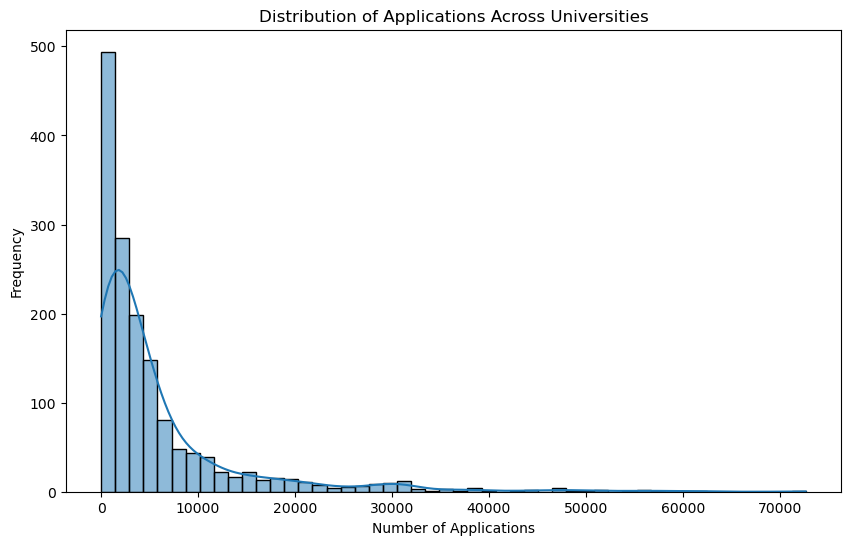


 Correlation between applications and enrollment: 0.80


In [57]:
# plotting the distribution of application across universities
plt.figure(figsize=(10, 6))
sns.histplot(df_copy['Applicants total'], bins=50, kde=True)
plt.title("Distribution of Applications Across Universities")
plt.xlabel("Number of Applications")
plt.ylabel("Frequency")
plt.show()

# correlation between applications and enrollment
correlation = df_copy['Applicants total'].corr(df_copy['Enrolled total'])
print('\n',f"Correlation between applications and enrollment: {correlation:.2f}")

#### Findings
- There is a strong positive correlation (r = 0.80, p < 0.0001) between the number of applicants and enrolled students.

- Universities receiving more applications tend to have higher enrollments, suggesting they are generally more preferred by students.

Admission Rate vs Enrollment: r = 0.13, p = 0.0000 



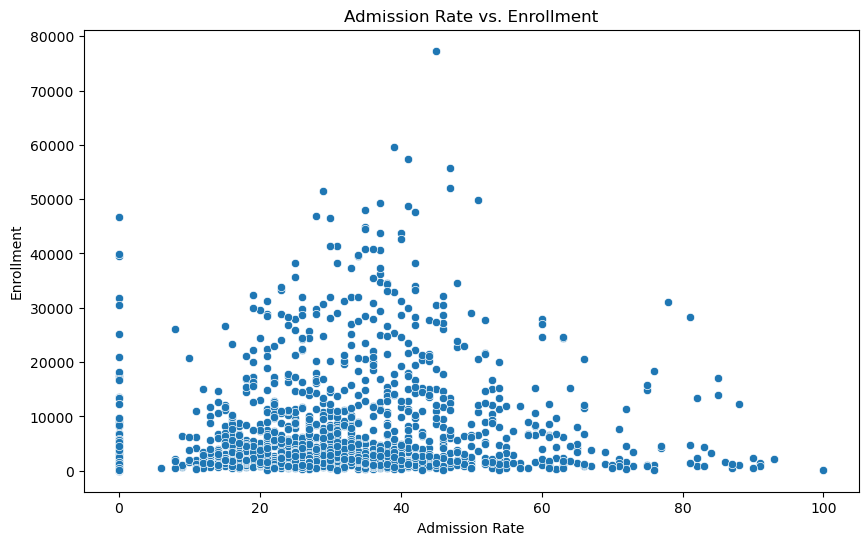

In [91]:
# Do students prefer universities that have a high rate of admission?
admissions_rate = df_copy['Admissions yield - total'].fillna(0) 
enrollment = df_copy['Total enrollment'].fillna(0)

corr, p_value = pearsonr(admissions_rate, enrollment)
print(f"Admission Rate vs Enrollment: r = {corr:.2f}, p = {p_value:.4f}",'\n')

# Plot Admission Rate vs Enrollment
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df_copy, x='Admissions yield - total', y='Total enrollment')
plt.title("Admission Rate vs. Enrollment")
plt.xlabel("Admission Rate")
plt.ylabel("Enrollment")
plt.show()

#### Findings
- A weak positive correlation (r = 0.13, p < 0.0001) exists between admission yield rate and enrollment.

- The admission rate plays a minor role in university preference. Students may consider other factors (e.g., reputation, location) beyond ease of admission.

In [93]:
# Do students prefer public or private universities?
# Analysing institutional type
# Distribution by institution control
print(df_copy['Control of institution'].value_counts(),'\n')
# Sector distribution
print(df_copy['Sector of institution'].value_counts())

Control of institution
Private not-for-profit    971
Public                    563
Name: count, dtype: int64 

Sector of institution
Private not-for-profit, 4-year or above    971
Public, 4-year or above                    563
Name: count, dtype: int64


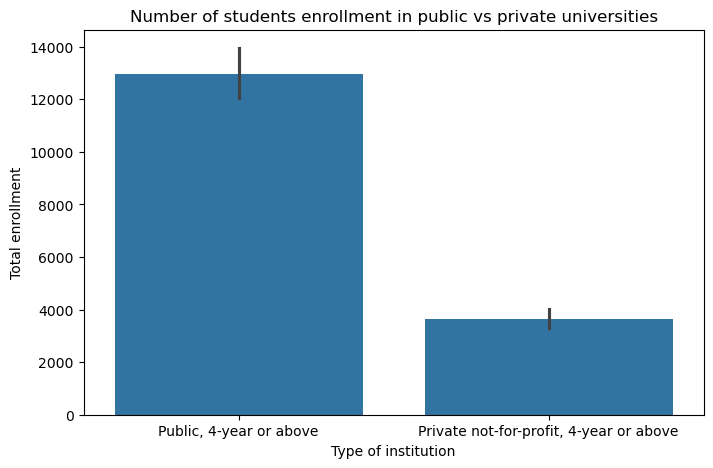

In [105]:
# Number of student enrollment public vs private universities
plt.figure(figsize = (8,5))
sns.barplot(data= df_copy, x='Sector of institution', y='Total enrollment')
plt.title('Number of students enrollment in public vs private universities')
plt.xlabel('Type of institution')
plt.ylabel('Total enrollment')
plt.show()

In [107]:
# Total enrollment summary
print(df_copy['Total enrollment'].describe(),'\n')

# Top ten college based on enrollment 
top_enrollment = df_copy[['Name','Total enrollment', 'Control of institution']].sort_values(by = 'Total enrollment', ascending=False).head(10)
print('----------------Top enrollment-------------','\n',top_enrollment)

count     1534.000000
mean      7060.896349
std       9413.854137
min          0.000000
25%       1512.000000
50%       3123.000000
75%       8374.750000
max      77338.000000
Name: Total enrollment, dtype: float64 

----------------Top enrollment------------- 
                                         Name  Total enrollment  \
1371                      Liberty University           77338.0   
196            University of Central Florida           59589.0   
998        Ohio State University-Main Campus           57466.0   
1309  Texas A & M University-College Station           55697.0   
1311       The University of Texas at Austin           52059.0   
634      University of Minnesota-Twin Cities           51526.0   
210                    University of Florida           49878.0   
606                Michigan State University           49317.0   
33            Arizona State University-Tempe           48702.0   
764         Rutgers University-New Brunswick           48036.0   

      Cont

#### Findings
- Although private not-for-profit universities are more numerous in the dataset, 8 of the top 10 universities by enrollment are public.

- While private universities are more prevalent, students seem to prefer public institutions for enrollment, possibly due to cost, accessibility, or offerings.

In [136]:
# Top ten university based on total enrollment and there average tuition fees
tuition_fee_col = ['Tuition and fees, 2010-11', 'Tuition and fees, 2011-12',
                   'Tuition and fees, 2012-13', 'Tuition and fees, 2013-14']

df_copy['Average Tuition Fees'] = df_copy[tuition_fee_col].mean(axis=1)

df_copy[['Name', 'Average Tuition Fees', 'Total enrollment']].sort_values(by='Total enrollment',ascending=False).head(10)

,Name,Average Tuition Fees,Total enrollment
1371,Liberty University,19488.50,77338.0
196,University of Central Florida,5792.25,59589.0
998,Ohio State University-Main Campus,9807.25,57466.0
1309,Texas A & M University-College Station,8455.00,55697.0
1311,The University of Texas at Austin,9699.50,52059.0
634,University of Minnesota-Twin Cities,13081.00,51526.0
210,University of Florida,5776.75,49878.0
606,Michigan State University,12209.50,49317.0
33,Arizona State University-Tempe,9359.25,48702.0
764,Rutgers University-New Brunswick,12971.25,48036.0


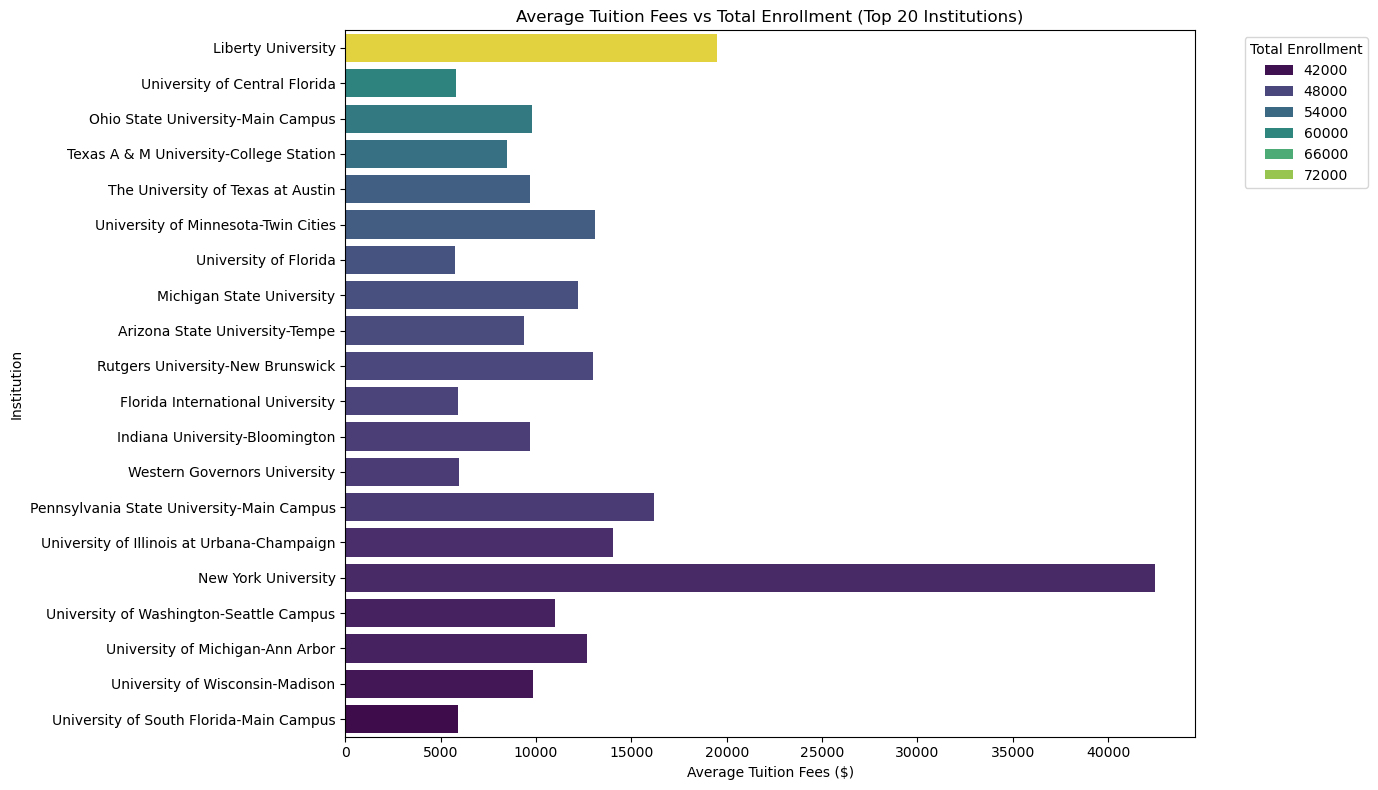

In [138]:
# Do students prefer universities with low tuition and fees?
# Compute average tuition for each institution
tuition_fee_col = ['Tuition and fees, 2010-11', 'Tuition and fees, 2011-12',
                   'Tuition and fees, 2012-13', 'Tuition and fees, 2013-14']

df_copy['Average Tuition Fees'] = df_copy[tuition_fee_col].mean(axis=1)

# Create a new DataFrame with relevant columns
plot_df = df_copy[['Name', 'Average Tuition Fees', 'Total enrollment']].dropna()

# Sort by total enrollment or tuition fees
plot_df = plot_df.sort_values(by='Total enrollment', ascending=False).head(20)  # top 20 by enrollment

# Create the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(
    x='Average Tuition Fees',
    y='Name',
    data=plot_df,
    hue='Total enrollment',
    dodge=False,
    palette='viridis'
)

# Labels and title
plt.xlabel('Average Tuition Fees ($)')
plt.ylabel('Institution')
plt.title('Average Tuition Fees vs Total Enrollment (Top 20 Institutions)')
plt.legend(title='Total Enrollment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [331]:
df_copy[['Name','Tuition and fees, 2010-11', 'Tuition and fees, 2011-12', 
                'Tuition and fees, 2012-13', 'Tuition and fees, 2013-14', 'Total enrollment']].sort_values(by='Total enrollment', ascending=False).head(10)

,Name,"Tuition and fees, 2010-11","Tuition and fees, 2011-12","Tuition and fees, 2012-13","Tuition and fees, 2013-14",Total enrollment
1371,Liberty University,18064.0,19154.0,19968.0,20768.0,77338.0
196,University of Central Florida,5021.0,5584.0,6247.0,6317.0,59589.0
998,Ohio State University-Main Campus,9420.0,9735.0,10037.0,10037.0,57466.0
1309,Texas A & M University-College Station,8387.0,8421.0,8506.0,8506.0,55697.0
1311,The University of Texas at Austin,9416.0,9794.0,9790.0,9798.0,52059.0
634,University of Minnesota-Twin Cities,12288.0,13022.0,13459.0,13555.0,51526.0
210,University of Florida,5044.0,5657.0,6143.0,6263.0,49878.0
606,Michigan State University,11152.0,12202.0,12622.0,12862.0,49317.0
33,Arizona State University-Tempe,8132.0,9720.0,9724.0,9861.0,48702.0
764,Rutgers University-New Brunswick,12559.0,12754.0,13073.0,13499.0,48036.0


<Axes: title={'center': 'Average tution fee(2010-2013)'}>

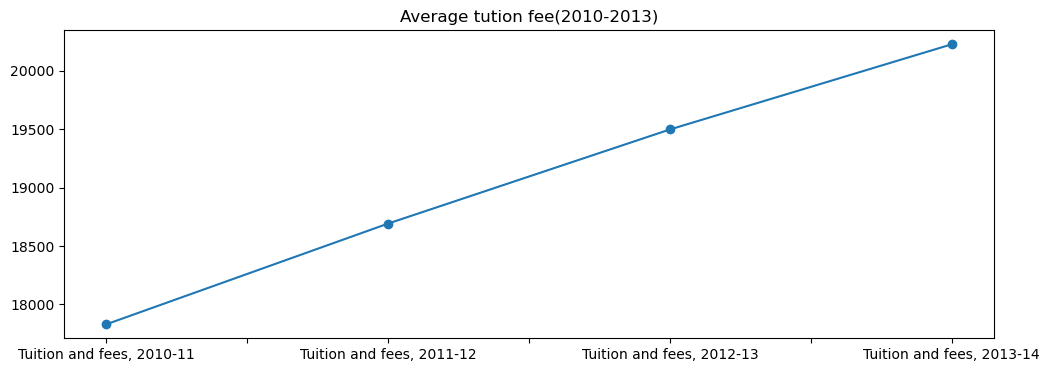

In [110]:
# Tution fee trend
Tution_fee_col = ['Tuition and fees, 2010-11', 'Tuition and fees, 2011-12', 
                'Tuition and fees, 2012-13', 'Tuition and fees, 2013-14']

# Plot average tution fee trend line
plt.figure(figsize=(12,4))
df_copy[Tution_fee_col].mean().plot(kind='line', title = 'Average tution fee(2010-2013)', marker='o')

#### Findings
- Several top-enrolled universities (e.g., University of Central Florida, University of Florida) have relatively low tuition, averaging around $5,000–6,000 per year.

- Students appear to favor institutions with lower tuition costs, making affordability a significant driver in university selection.

In [140]:
# Do students prefer a university for its low on-campus cost of living?
# Load relevant columns and drop missing values
cols = ['Total price for in-state students living on campus 2013-14',
        'Total price for out-of-state students living on campus 2013-14',
        'Total enrollment']

df_cost = df_copy[cols].dropna()

# Pearson correlation
in_corr, _ = pearsonr(df_cost['Total price for in-state students living on campus 2013-14'],
                      df_cost['Total enrollment'])

out_corr, _ = pearsonr(df_cost['Total price for out-of-state students living on campus 2013-14'],
                       df_cost['Total enrollment'])

print(f"Correlation (In-State Cost vs Enrollment): {in_corr:.2f}")
print(f"Correlation (Out-of-State Cost vs Enrollment): {out_corr:.2f}")

Correlation (In-State Cost vs Enrollment): -0.14
Correlation (Out-of-State Cost vs Enrollment): 0.07


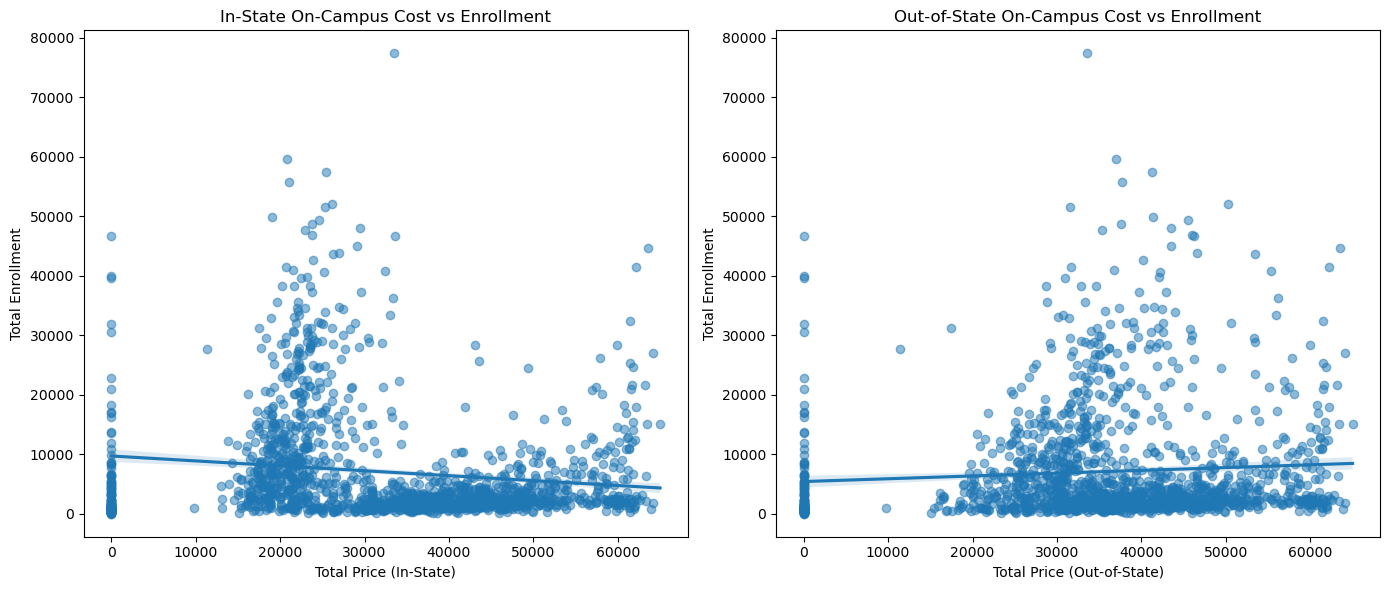

In [146]:
# Scatter plots
plt.figure(figsize=(14, 6))

# In-State Plot
plt.subplot(1, 2, 1)
sns.regplot(
    x='Total price for in-state students living on campus 2013-14',
    y='Total enrollment',
    data=df_cost,
    scatter_kws={'alpha':0.5}
)
plt.title('In-State On-Campus Cost vs Enrollment')
plt.xlabel('Total Price (In-State)')
plt.ylabel('Total Enrollment')

# Out-of-State Plot
plt.subplot(1, 2, 2)
sns.regplot(
    x='Total price for out-of-state students living on campus 2013-14',
    y='Total enrollment',
    data=df_cost,
    scatter_kws={'alpha':0.5}
)
plt.title('Out-of-State On-Campus Cost vs Enrollment')
plt.xlabel('Total Price (Out-of-State)')
plt.ylabel('Total Enrollment')

plt.tight_layout()
plt.show()

#### Findings
- There is a slight negative correlation (-0.14) between in-state on-campus cost and enrollment, and a very weak positive correlation (0.07) for out-of-state costs.

- While not a major factor, lower living costs might slightly influence enrollment, particularly for in-state students.

In [212]:
# Do students prefer a university because it belongs to a state with a high GDP per capita?
gdp_df = pd.read_csv('states_gdp.csv')
gdp_data = gdp_df[['state', 'gdp_million']]
merged_df = df_copy.merge(gdp_data, left_on='State abbreviation', right_on = 'state', how='left')
unique_rows = merged_df[['gdp_million', 'State abbreviation']].drop_duplicates()
print(unique_rows)

      gdp_million    State abbreviation
0        191481.0               Alabama
28        56622.8                Alaska
32       275199.1               Arizona
40       114251.5              Arkansas
60      2262771.2            California
142      288305.2              Colorado
160      246632.0           Connecticut
180       60666.1              Delaware
184      114891.0  District of Columbia
192      800704.1               Florida
231      460585.1               Georgia
272       75788.3                Hawaii
277       61017.7                 Idaho
284      739627.9              Illinois
338      308681.7               Indiana
379      160299.8                  Iowa
406      143220.7                Kansas
430      182359.2              Kentucky
458      228967.4             Louisiana
479       53719.0                 Maine
496      341255.3              Maryland
521      454345.7         Massachusetts
580      432717.6              Michigan
621      306153.0             Minnesota


In [214]:
# Check the correlation between gdp and enrollment
mdf_clean = merged_df.dropna(subset=['gdp_million', 'Total enrollment'])
gdp = mdf_clean['gdp_million']
enrollment = mdf_clean['Total enrollment']

corr, p_value = pearsonr(gdp, enrollment)
print(f"Pearson correlation between state GDP and total enrollment: {corr:.2f}, p-value: {p_value:.4f}")

Pearson correlation between state GDP and total enrollment: 0.11, p-value: 0.0000


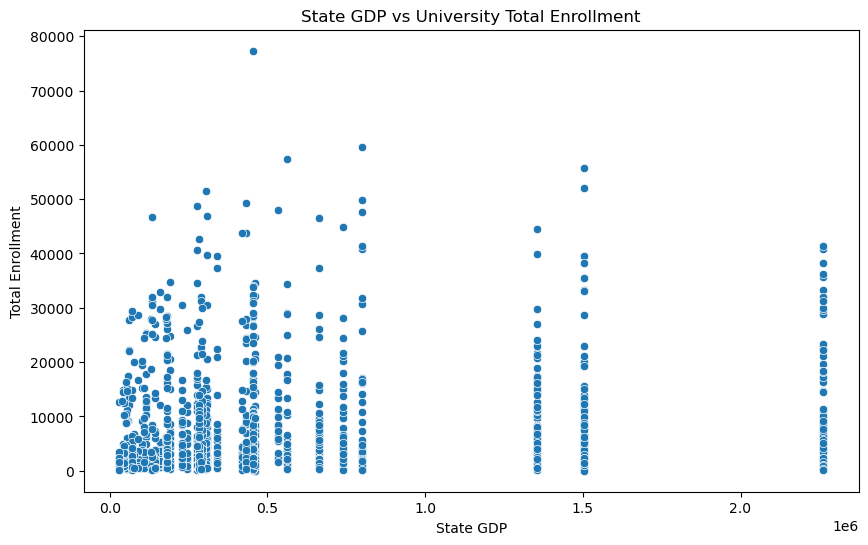

In [220]:
# Plot state gdp vs total enrollment
plt.figure(figsize=(10,6))
sns.scatterplot(x='gdp_million', y='Total enrollment', data=mdf_clean)
plt.title('State GDP vs University Total Enrollment')
plt.xlabel('State GDP')
plt.ylabel('Total Enrollment')
plt.show()

#### Findings
- A weak positive correlation (r = 0.11, p < 0.0001) exists between state GDP and total enrollment.

- Economic strength of a state has limited influence on university preference, indicating GDP is not a major deciding factor for students.

In [245]:
# Do students prefer a university based on the possibility of a higher, additional academic degree in the same university?
# Replace the NaN with 0 in the degree columns
degree_col = [
    'Offers Master\'s degree', 
    'Offers Doctor\'s degree - research/scholarship', 
    'Offers Doctor\'s degree - professional practice',
    'Offers Postbaccalaureate certificate', 
    'Offers Post-master\'s certificate'
]
df_copy[degree_col] = df_copy[degree_col].fillna(0)

# Covert to boolean
df_copy[degree_col] = df_copy[degree_col].astype(bool)

grouped = df_copy.groupby('Offers Master\'s degree')['Total enrollment'].mean()
print(grouped)

Offers Master's degree
False       0.00000
True     7070.11423
Name: Total enrollment, dtype: float64


In [247]:
print(df_copy['Offers Master\'s degree'].value_counts(),'\n')
print(df_copy[df_copy['Offers Master\'s degree'] == False]['Total enrollment'].describe())

Offers Master's degree
True     1532
False       2
Name: count, dtype: int64 

count    2.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: Total enrollment, dtype: float64


In [85]:
# count how many institution offer each degree
degree_col = [col for col in df_copy.columns if 'degree' in col]
degree_offer_stats = df[degree_col].apply(lambda x: (x == 'Yes').sum()).sort_values(ascending=False)
degree_offer_stats

Offers Bachelor's degree                                   1522
Offers Master's degree                                     1249
Offers Associate's degree                                   648
Offers Doctor's degree - research/scholarship               511
Offers Doctor's degree - professional practice              435
Offers Doctor's degree - other                               57
Offers Other degree                                           6
Highest degree offered                                        0
Number of students receiving a Bachelor's degree              0
Graduation rate - Bachelor degree within 5 years, total       0
Graduation rate - Bachelor degree within 4 years, total       0
Number of students receiving a Doctor's degree                0
Number of students receiving a Master's degree                0
Master's degrees awarded                                      0
Number of students receiving an Associate's degree            0
Doctor's degrees - other awarded        

In [105]:
# Calculate the Enrollment rate
df_copy['Enrollment Rate (%)'] = (df_copy['Enrolled total']/df['Admissions total'])*100
print(df_copy['Enrollment Rate (%)'].describe())

count    1376.000000
mean       33.062539
std        14.989961
min         5.885079
25%        22.066177
50%        30.406672
75%        40.420910
max       100.000000
Name: Enrollment Rate (%), dtype: float64


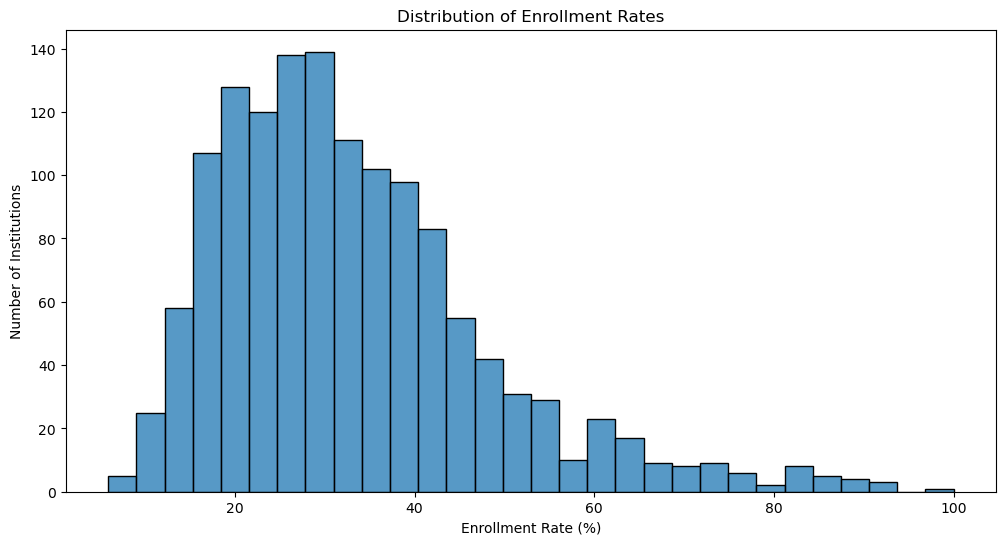

In [123]:
# plotting number of institution vs enrollment rate (%)
plt.figure(figsize=(12,6))
sns.histplot(df_copy['Enrollment Rate (%)'], bins=30)
plt.title('Distribution of Enrollment Rates')
plt.xlabel('Enrollment Rate (%)')
plt.ylabel('Number of Institutions')
plt.show()

In [249]:
 df_grad = df_copy[['Graduation rate - Bachelor degree within 4 years, total', 'Graduation rate - Bachelor degree within 5 years, total',
 'Graduation rate - Bachelor degree within 6 years, total']]

In [251]:
# Graduation within 4, 5, and 6 years
grad_rate_cols = ['Graduation rate - Bachelor degree within 4 years, total',
                  'Graduation rate - Bachelor degree within 5 years, total',
                  'Graduation rate - Bachelor degree within 6 years, total']

df[grad_rate_cols].describe()

,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total"
count,1476.000000,1476.000000,1476.000000
mean,37.450542,49.788618,53.189024
std,21.949856,20.256726,19.102511
min,0.000000,0.000000,0.000000
25%,20.000000,36.000000,40.000000
50%,34.000000,49.000000,52.500000
75%,52.250000,63.000000,66.000000
max,100.000000,100.000000,100.000000


In [292]:
print('Avg tuition fees   ----->',df_copy['Total price for in-state students living on campus 2013-14'].mean())
print('Avg gradution rate ----->',df_copy['Graduation rate - Bachelor degree within 6 years, total'].mean())

Avg tuition fees   -----> 31883.591264667535
Avg gradution rate -----> 51.17796610169491


In [294]:
#  The most lucrative colleges for students in terms of both pass rate and cost
# Define threshold
grad_rate_threshold = 70  # at least 70% graduation rate
cost_threshold = 32000 # total in cost must be <= 21000

# Select relevent columns
lucrative_threshold_df = lucrative_df[
    (lucrative_df['Graduation rate - Bachelor degree within 6 years, total'] >= grad_rate_threshold) &
    (lucrative_df['Total price for in-state students living on campus 2013-14'] <= cost_threshold)
]

# Sort by graduation rate descending
lucrative_threshold_df = lucrative_threshold_df.sort_values(
    by='Graduation rate - Bachelor degree within 6 years, total', ascending=False
)

# View results
lucrative_college = lucrative_threshold_df[['Name','Graduation rate - Bachelor degree within 6 years, total', 
                                            'Total price for in-state students living on campus 2013-14']]

In [322]:
# Top 50 most lucratibe college for students in terms of pass rate and cost
lucrative_college.head(50)

,Name,"Graduation rate - Bachelor degree within 6 years, total",Total price for in-state students living on campus 2013-14
95,Coleman University,100.0,0.0
1332,Stevens-Henager College-Ogden,100.0,0.0
1391,University of Virginia-Main Campus,93.0,26075.0
1360,College of William and Mary,90.0,28329.0
930,University of North Carolina at Chapel Hill,90.0,24024.0
605,University of Michigan-Ann Arbor,90.0,26240.0
210,University of Florida,87.0,19103.0
83,University of California-Irvine,86.0,30504.0
86,University of California-San Diego,86.0,30470.0
301,University of Illinois at Urbana-Champaign,84.0,29086.0


## 📌Key Insights From Quantitative and Qualitative Analysis

#### 1. Do universities with a high number of applications appear more preferred by students?
- Findings: There is a strong positive correlation (r = 0.80, p < 0.0001) between the number of applicants and enrolled students.

- Conclusion: Yes, universities receiving more applications tend to have higher enrollments, suggesting they are generally more preferred by students.

#### 2. Do students prefer universities with a high rate of admission?
- Findings: A weak positive correlation (r = 0.13, p < 0.0001) exists between admission yield rate and enrollment.

- Conclusion: The admission rate plays a minor role in university preference. Students may consider other factors (e.g., reputation, location) beyond ease of admission.

#### 3. Do students prefer public or private universities?
- Findings: Although private not-for-profit universities are more numerous in the dataset, 8 of the top 10 universities by enrollment are public.

- Conclusion: While private universities are more prevalent, students seem to prefer public institutions for enrollment, possibly due to cost, accessibility, or offerings.

#### 4. Do students prefer universities with low tuition and fees?
- Findings: Several top-enrolled universities (e.g., University of Central Florida, University of Florida) have relatively low tuition, averaging around $5,000–6,000 per year.

- Conclusion: Yes, students appear to favor institutions with lower tuition costs, making affordability a significant driver in university selection.

#### 5. Do students prefer a university for its low on-campus cost of living?
- Findings: There is a slight negative correlation (-0.14) between in-state on-campus cost and enrollment, and a very weak positive correlation (0.07) for out-of-state costs.

- Conclusion: While not a major factor, lower living costs might slightly influence enrollment, particularly for in-state students.

#### 6. Do students prefer universities from highly populated states?
- Data Limitation: The dataset does not include state population directly, so no definitive correlation could be measured.

- Conclusion: Unable to draw a conclusion due to lack of population data.

#### 7. Do students prefer a university because it belongs to a state with a high GDP per capita?
- Findings: A weak positive correlation (r = 0.11, p < 0.0001) exists between state GDP and total enrollment.

- Conclusion: Economic strength of a state has limited influence on university preference, indicating GDP is not a major deciding factor for students.

#### 8. Do students prefer a university based on the possibility of a higher academic degree?
- Findings: Institutions offering a Master’s degree had significantly higher average enrollments (7070 students), whereas those not offering it had zero enrollment in this dataset.

- Conclusion: Yes, availability of higher degrees strongly correlates with student preference, likely due to academic progression opportunities.



## 🎯 Conclusion for Main question
#### What is the likely enrollment rate and graduation rate across universities?
- The average enrollment rate is around 33%, indicating that roughly 1 in 3 applicants enroll at a given institution.

- The average graduation rate within 6 years is about 51.2%, but can vary significantly across institutions.

- These numbers give a benchmark for institutional planning and student expectations.

#### Which colleges are the most lucrative in terms of graduation rate and cost?
- Colleges like University of Florida, University of Virginia, College of William and Mary, and Brigham Young University-Provo provide a high graduation rate (≥ 75%) at a reasonable in-state cost (≤ $32,000). These schools offer strong returns on investment, making them especially attractive to cost-conscious students seeking high academic outcomes.